In [221]:
import pandas as pd
import seaborn as sns
import json
import pickle
import os
sns.set(style="darkgrid", palette='viridis')

# Only one rating (for both classic and rapid)

In [207]:
files = os.listdir('../data/ratings/v4/')
all_ratings = pd.DataFrame()
for file in files:
    if not file.endswith('.pickle'):
        print(f"Ignoring file {file}")
        continue
    players_list = pd.read_pickle("../data/ratings/v4/" + file)
    players = pd.DataFrame()
    parts = file.split(".")
    year = parts[0][-4:]
    
    for player in players_list:
        player_df = pd.DataFrame([player])
        players = pd.concat([players, player_df], ignore_index=True)

    players['year'] = int(year)
    all_ratings = pd.concat([all_ratings, players], ignore_index=True)

Ignoring file ratings_2014.json
Ignoring file ratings_2015.json
Ignoring file ratings_2016.json
Ignoring file ratings_2017.json
Ignoring file ratings_2018.json
Ignoring file ratings_2019.json
Ignoring file ratings_2020.json


In [214]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            3934 non-null   object
 1   rating          3934 non-null   int64 
 2   nr_games        3934 non-null   int64 
 3   wins            3934 non-null   int64 
 4   losses          3934 non-null   int64 
 5   avg_opp_rating  3934 non-null   int64 
 6   year            3934 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 215.3+ KB


In [216]:
all_ratings.head()

,name,rating,nr_games,wins,losses,avg_opp_rating,year
0,Yuan Zhenshan,1460,124,27,47,1460,2014
1,Li Hai,1757,140,47,22,1549,2014
2,Zhang Chun,1603,80,23,19,1560,2014
3,Hao Xing,2371,76,24,16,2260,2014
4,Zhang Muxing,2220,112,29,42,2169,2014


In [217]:
players_performance = all_ratings.groupby(by=['name', 'year']).rating.sum().reset_index()

In [218]:
players_performance

,name,year,rating
0,Bai Xiaoan,2014,2220
1,Bai Xiaoan,2015,2138
2,Bai Xiaoan,2016,2129
3,Bai Xiaoan,2017,2116
4,Bai Xiaoan,2018,2107
...,...,...,...
3929,Zou Jiangxiang,2016,2163
3930,Zou Jiangxiang,2017,2116
3931,Zou Jiangxiang,2018,2203
3932,Zou Jiangxiang,2019,2230


# Top players in 2020 according to the updating system

In [222]:
players_2020 = all_ratings.loc[all_ratings['year']==2020].sort_values(by='rating', ascending=False)
players_2020.head()

,name,rating,nr_games,wins,losses,avg_opp_rating,year
3651,Liu Yaosheng,2635,632,341,84,2195,2020
3821,Fan Cunniu,2626,730,395,84,2203,2020
3641,Li Qingmei,2610,469,243,65,2007,2020
3896,Song Zeji,2606,716,414,76,2004,2020
3531,Wu Fujun,2603,641,349,86,2040,2020


Now let's read the provided file for the top 200 players in 2020:

In [233]:
ratings_2020 = dict()
try:
    with open('../data/io/rating_2020.txt',encoding="utf-8") as f:
        for line in f.readlines():
            line = line.rstrip()
            line = line.lstrip()
            # remove commas
            line = line.replace(",","")
            line = line.replace('\t',' ')
            words = line.split(" ")
            name = words[0] + ' ' + words[1]
            if 'ü' in name:
                name = name.replace('ü', 'u')
            rating = words[2]
            ratings_2020[name] = int(rating)
except Exception as e:
    print(e)
finally:
    f.close()

In [234]:
v_ratings_2020 = pd.DataFrame()
v_ratings_2020['name'] = ratings_2020.keys()
v_ratings_2020['rating'] = ratings_2020.values()
v_ratings_2020.head()

,name,rating
0,Hou Nawei,2668
1,Xu Xianyan,2620
2,Wu Xiongcang,2594
3,Tang Yangwen,2583
4,Chen Xiangke,2575


In [235]:
v_ratings_2020.rename(columns={'rating': 'ref_rating'}, inplace= True)

In [236]:
v_ratings_2020 = v_ratings_2020.merge(players_2020, how='left', on='name')
v_ratings_2020.head()

,name,ref_rating,rating,nr_games,wins,losses,avg_opp_rating,year
0,Hou Nawei,2668,2554,349,230,35,2185,2020
1,Xu Xianyan,2620,2541,447,287,25,2212,2020
2,Wu Xiongcang,2594,2417,405,147,87,2205,2020
3,Tang Yangwen,2583,2338,504,204,119,2197,2020
4,Chen Xiangke,2575,2434,467,194,107,2224,2020


In [237]:
v_ratings_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            199 non-null    object
 1   ref_rating      199 non-null    int64 
 2   rating          199 non-null    int64 
 3   nr_games        199 non-null    int64 
 4   wins            199 non-null    int64 
 5   losses          199 non-null    int64 
 6   avg_opp_rating  199 non-null    int64 
 7   year            199 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 14.0+ KB


In [238]:
v_ratings_2020['rating_diff'] = v_ratings_2020['ref_rating'] - v_ratings_2020['rating']
v_ratings_2020.head()

,name,ref_rating,rating,nr_games,wins,losses,avg_opp_rating,year,rating_diff
0,Hou Nawei,2668,2554,349,230,35,2185,2020,114
1,Xu Xianyan,2620,2541,447,287,25,2212,2020,79
2,Wu Xiongcang,2594,2417,405,147,87,2205,2020,177
3,Tang Yangwen,2583,2338,504,204,119,2197,2020,245
4,Chen Xiangke,2575,2434,467,194,107,2224,2020,141


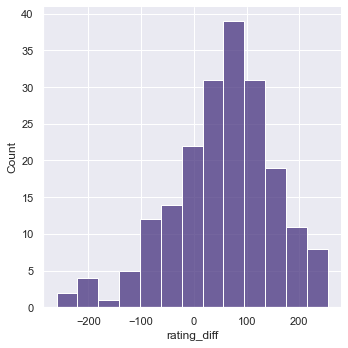

In [239]:
sns.displot(x='rating_diff', data= v_ratings_2020)

In [240]:
v_ratings_2020.describe()

,ref_rating,rating,nr_games,wins,losses,avg_opp_rating,year,rating_diff
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000
mean,2398.643216,2342.507538,599.482412,214.924623,151.728643,2113.492462,2020.0,56.135678
std,71.192429,108.118008,126.065152,72.799776,51.802039,108.552918,0.0,97.630186
min,2303.000000,2121.000000,323.000000,95.000000,25.000000,1817.000000,2020.0,-260.000000
25%,2343.000000,2260.500000,543.000000,165.000000,116.000000,2026.500000,2020.0,1.000000
50%,2388.000000,2335.000000,607.000000,205.000000,151.000000,2154.000000,2020.0,68.000000
75%,2434.500000,2412.500000,652.000000,248.500000,184.000000,2205.000000,2020.0,122.500000
max,2668.000000,2635.000000,1907.000000,717.000000,433.000000,2251.000000,2020.0,254.000000


In [252]:
right_rating = v_ratings_2020[v_ratings_2020['rating_diff'].between(-15, 15)]
right_rating

,name,ref_rating,rating,nr_games,wins,losses,avg_opp_rating,year,rating_diff,r_range
5,Duan Liji,2570,2555,667,369,74,2225,2020,15,r>2550
47,Deng Zhenhua,2436,2423,537,212,114,2242,2020,13,2350<=r<=2450
75,Zheng Rendan,2409,2418,659,205,203,1914,2020,-9,2350<=r<=2450
89,Zheng Xuanzhen,2393,2379,630,273,124,2120,2020,14,2350<=r<=2450
90,Yang Yue,2393,2403,605,211,170,1902,2020,-10,2350<=r<=2450
104,Zhang Yan,2322,2330,1907,717,433,2050,2020,-8,2250<=r<=2350
113,Chen Pingxing,2373,2381,701,267,137,2163,2020,-8,2350<=r<=2450
123,Zheng Liuge,2364,2363,630,233,136,1929,2020,1,2350<=r<=2450
127,Tian Jiada,2362,2361,596,188,181,2025,2020,1,2350<=r<=2450
128,Lu Xingmiao,2362,2348,605,187,215,1881,2020,14,2250<=r<=2350


On average our rating after processing the games is 56 lower than the one of the provided reference list. Besides for the half of the players the difference is less than 68 points. 

There are very few cases where we have given a higher rating than the real one. This means that our processing rating system is underestimating a bit the potential of some players.

## Correction factor
It seems that our process of updating the ratings is underestimating the true skill of players, probably because we did not have the initial ratings of all players but just the top 200 ones. Let's try to quantify the difference in ratings depending on the rating's range of the player.

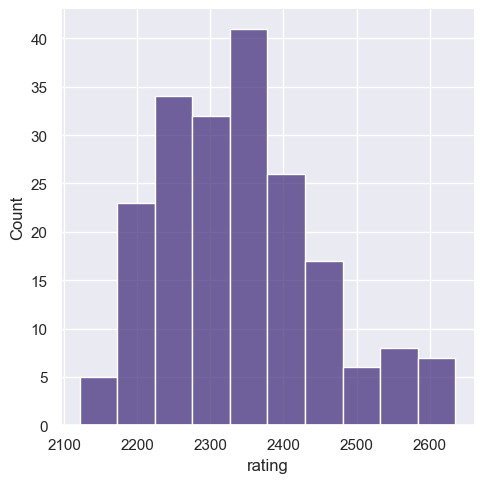

In [241]:
sns.displot(x='rating', data= v_ratings_2020)

The majority of our ratings are between 2200 and 2450.

In [242]:
def get_range_label(r):
    if r < 1000:
        return 'r<1000'
    if r>=1000 and r<=2000:
        return '1000<=r<=2000'
    if r>2000 and r<=2250:
        return '2000<=r<=2250'
    if r>2250 and r<=2350:
        return '2250<=r<=2350'
    if r>2350 and r<=2450:
        return '2350<=r<=2450'
    if r>2450 and r<=2550:
        return '2450<=r<=2550'
    return 'r>2550'

In [243]:
v_ratings_2020['r_range'] = v_ratings_2020.rating.apply(lambda x: get_range_label(x))

In [244]:
v_ratings_2020.r_range.value_counts()

2250<=r<=2350    75
2350<=r<=2450    50
2000<=r<=2250    43
2450<=r<=2550    19
r>2550           12
Name: r_range, dtype: int64

Now let's see the difference betweeen ratings but for each player profile type.

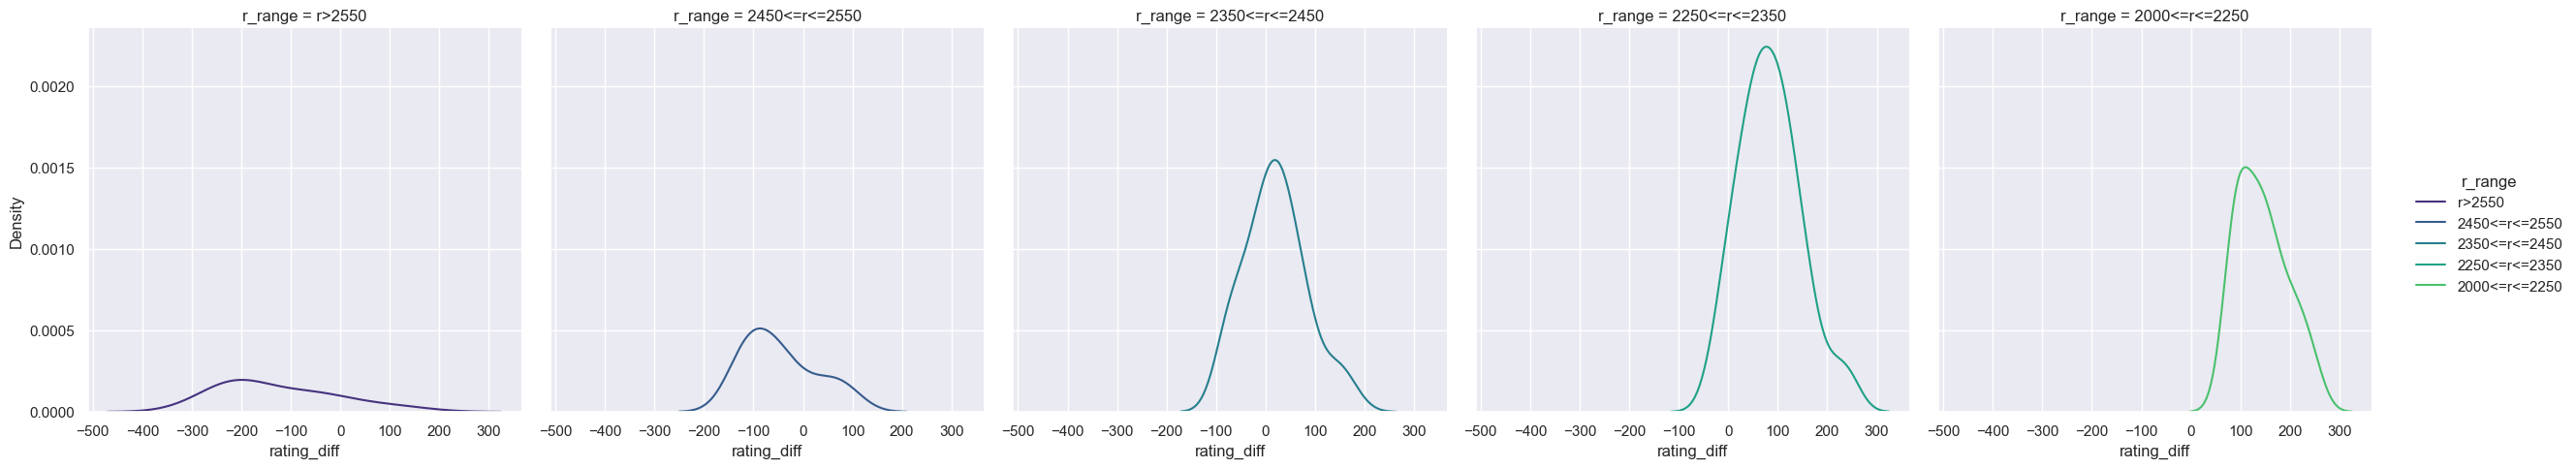

In [248]:
sns.displot(data=v_ratings_2020, x="rating_diff", hue="r_range", col="r_range", kind="kde")

As we see the difference in ratings depends on the skill range of the player. It is interesting that for players with ratings between 2350 and 2450 the difference is usually zero, meaning that our approximation is quite accurate. The majority of the cases where the deviation is bigger is for players between 2000 and 2350. Basically our ratings are underestimating players under average and overestimating players above average. The average players are the ones with the best approximation.

Thus we could define a rating correction factor (rcf) for a rating player (r) like this:

* if r is in the range [2000, 2350] then rcf = 100
* if r is in the range [2350, 2450] then rcf = 0
* if r is in the range [2450, 2550] then rcf = -100
* if r is bigger than 2550 then rcf = -200

This factor could be used to adjust our predictions. See the notebook "Elo Predictor Evaluation" for more details of the impact of this factor on the accuracy.

# Optimal seed value for the best match with the reference ratings

## For Predictor v4
We developed just a quick pipeline to check if by changing the seed value of the initial ratings for unrated players there is some effect on the accuracy of the predictions and the number of correctly computed ratings. 

Different initial rating values were given: [900, 1000, 1500, 1800]

The correct predictions and accuracy were computed the same way as for the evaluation of the predictor. As for the correct ratings, we considered that the final rating was correct if the difference with the reference 2020 rating was between the range of [-15, 15], i.e. we considered that a rating up to 15 above or under the real value is correct. Thus the last column is the number of counted correct ratings for the final 2020 ratings.

# Summary
We confirm the hypothesis that the seed value 1000, as suggested in the literature, is the best option to optimize results. Besides, the rcf factor can be used as an adjustment for the evaluation of the predictor. 